## 7. Óra 
# Kényszerkielégítés

milyen adatokkal lehet megadni egy kényszer-kielégítési feladatot?
-   változók: WA,NT,Q,NSW,V,SA,T
-   tartományok: Di = {piros,kék,zöld}
-   kényszerek: a szomszédos tartomány nem lehet ugyanolyan színű

A feladat célja az lenne, hogy Ausztrália tartományait színezgetjükk, de szomszédos tartományok nem lehetnek egyforma színűek. 

In [1]:
#Képezzük le gráfra Ausztráliát
graph = [[0,1,1,0,0,0],
        [1,0,1,1,1,1],
        [1,1,0,1,1,1],
        [0,1,1,0,1,0],
        [0,1,1,1,0,1],
        [0,1,1,0,1,0]]

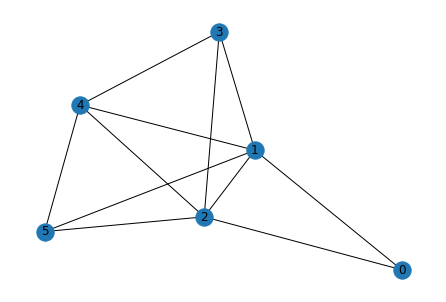

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

#Ezekkel a bigyókkal lehet grágokat készíteni

G = nx.Graph()
for i in range(len(graph)):
    for j in range(i+1,len(graph)):
        if graph[i][j]:
            G.add_edge(i,j)
            #G.add_edge(i + 1,j + 1)

pos = nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

# Visszalépéses algoritmus


In [3]:
def is_safe(graph,color,v,c):
    """
    ellenőrzi hogy egy adott szin biztonságos-e a csúcson
    ha van  szomszédja, amely már ugyanaz a szín,
    akkor a vizsgált csúcs nem lehet olyan
    """

    for i in range(len(graph)):
        if graph[v][i] and c == color[i]:
            return False
    return True

In [4]:
def backtracking(graph,graf_colors,v,colors):
    """a graph_coloring_util függvény rekurzivan meghívja önmagát minden csúcsra.
    Ha van már olyan színű szomszédja, ami adni akar, akkor mást ad"""

    if v == len(graph):
        return True

    for c in range(colors):
        if is_safe(graph,graf_colors,v,c):
            graf_colors[v] = c

            if backtracking(graph,graf_colors,v+1,colors):
                return True

            graf_colors[v] = -1
    
    return False

In [5]:
def graph_coloring(graph,colors):
    n=len(graph)
    graf_colors = [-1] * n
    graf_colors[0] = 0

    if not backtracking(graph,graf_colors,0,colors):
        return None

    return graf_colors

In [6]:
colors = 4
coloring = graph_coloring(graph,colors)

if coloring:
    print("a gráf színezése: ",coloring)
else:
    print("nem találtam megoldást")

a gráf színezése:  [0, 1, 2, 0, 3, 0]


In [ ]:
def is_safe_csp(graph, colors):

    for i in range(len(graph)):
        for j in range(i+1,len(graph)):
            if graph[i][j] and colors[j] == colors[i]:
                return False
    return True

In [ ]:
def graph_coloring_csp(graph,colors,v,graf_colors):

    if v == len(graph):

        if is_safe_csp(graph,graf_colors):
            print(graf_colors)
            return True
        else:
            return False

    for j in range(0,colors):
        graf_colors[v] = j
        if graph_coloring_csp(graph,colors,v+1,graf_colors):
            return True
        graf_colors[v] = -1

In [ ]:
colors = 4
graf_colors = [-1]*len(graph)
graph_coloring_csp(graph,colors,0,graf_colors)